# Project: Wrangling and Analyze Data

## Importing Required Libaries
In this section, I would be importing the required libraries which include:
    1. Numpy - array for numerical data
    2. Pandas - dataframe for manipulation and analysis
    3. Matplotlib - visualizations
    4. Seaborn - visualizations
    5. requests - web request
    6. os - api request
    7. tweepy - Twitter API
    8. json - JSON API

N.B: I would not be using tweepy library function because I do not have access to the Twitter developed elevated access yet.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import os

sns.set_style('darkgrid')

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#reading the Twitter Archive data

df1 = pd.read_csv('twitter-archive-enhanced-2.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#programmitcally downloading the tweet image prediction data

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#saving the downloaded tweet image prediction data into the workspace

with open (os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#reading the saved tweet image prediction data

df2 = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I am supposed to access this data using the Twitter API through Tweepy library but I would not be doing that because I do not have the elevated access to the Twitter developer API yet. To complete the project, I would be accessing the data by uploading the tweet_json file manually 

In [ ]:
# Below is the coded needed to scrap the twitter-json file using Tweepy API. Note that code would not run

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Extracting the needed dicts and their corresponding values and creating a dataframe with them

df_list = []
with open('tweet-json.txt','r', encoding='utf-8') as file:
    for line in file.readlines():
        lines = json.loads(line)
        tweet_id = lines['id']
        retweet_cnt = lines['retweet_count']
        fav_cnt = lines['favorite_count']
        df_list.append({'tweet_id':tweet_id,'retweet_cnt':retweet_cnt,'fav_cnt':fav_cnt})
df3 = pd.DataFrame(df_list, columns=['tweet_id','retweet_cnt','fav_cnt'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assesment of the Data

In this part of the wrangling, I am going to be assessing the data visually

In [7]:
#Visually assessing the Twitter archive data 

df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### __OBSERVATION__

From the above result, we can observe that df1 (*twitter archive data*) has __*2356 rows and 17 columns*__ with the description to each column shown below:

* __tweet_id__: This is the unique identifier for each tweet


* __in_reply_to status_id__: This is an identifier in reference to the original tweet ID if the tweet is a reply to another tweet


* __in_reply_user_id__: This is an identifier in reference to the original tweet's author if the tweet is a reply to another tweet


* __timestamp__: This is the time the tweet was created


* __source__: This is the placeholder used to show the device used to post the tweet


* __text__: This is the actual UFT-8 text of the tweet


* __retweeted_to status_id__: This is an identifier in reference to the original tweet ID if the tweet is a retweet


* __retweeted_user_id__: This is an identifier in reference to the original tweet's author if the tweet is a retweet


* __retweeted_status_timestamp__: This is the time the originsl tweet was retweeted


* __expanded_urls__: This is the url or link to the tweet


* __rating_numerator__: This is the numerator of the rating and it is usually greater than or equal to 10. Note that there are some cases where the numerator is less than 10


* __rating_denominator__: This is the denominator of the rating and it is usually equals to 10. Note that there are cases where the numerator is less than 10 and others higher than 10


* __name__: This is the name of the dog


* __doggo__: This is one of the four stages of a dog


* __floofer__: This is another one type of four stages of a dog


* __pupper__: This is another one of the four stages of a dog


* __puppo__: This is another of the four stages of a dog



In [8]:
# Visually assessing Tweet Image Prediction data

df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### __OBSERVATION__

From the dataset above, it can be observed that df2 (*tweet image prediction) has __*2057 rows and 12 columnns*__ with the columns description shown below:


* __tweet_id__: This is the unique identifier for each tweet


* __jpg_url__: This is the url of the dog's image


* __img_num__: This is the number of the image that corresponds to the image prediction.Max is 4 since twitter only allows up to 4 images per tweet


* __p1__: This is the first alogrithm for the image prediction


* __p1_conf__: This represents the confidence of the first image prediction algorithm


* __p1_dog__ This column is boolean showing if the image predicted by the first algorithm is a dog


* __p2__: This is the second alogrithm for the image prediction


* __p2_conf__: This represents the confidence of the second image prediction algorithm


* __p2_dog__ This column is boolean showing if the image predicted by the second algorithm is a dog 


* __p3__: This is the third alogrithm for the image prediction


* __p3_conf__: This represents the confidence of the third image prediction algorithm


* __p3_dog__ This column is boolean column showing if the image predicted by the third algorithm is a dog 

In [9]:
# Visually assessing the Twitter json file

df3

,tweet_id,retweet_cnt,fav_cnt
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### __OBSERVATION__

From the above dataset, it can be observed that df3 (*twitter json file*) contains __*2354 rows and 3 Columns*__ with the columns description shown below:

* __tweet_id__: This is the unique identifier for each tweet


* __retweet_cnt__: This is the number of times each original tweets were retweeted


* __fav_cnt__: This is the number of times each original tweets were liked

### Programmatical Assessment of the Data

In this part of data wrangling, the data will be assessed programmatically using the neccessary pandas functions

> Retrieving information about the dataframe using the __*df.info function*__ to show us:

* number of columns, 

* column labels, 

* column data types, 

* memory usage, 

* range index, and 

* the number of cells in each column (non-null values)


In [10]:
# Applying df.info on Twitter Archive Data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Applying the df.info function on Tweet Image Prediction Data

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
# Applying the df.info function on Twitter json Data

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id       2354 non-null int64
retweet_cnt    2354 non-null int64
fav_cnt        2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


> Observing samples in the datasets using **df.tail()**,**df.head()** and **df.sample()**.

* **df.tail()** - This will show us the last few rows in the dataset

* **df.head()** - This will show us the first few rows in the dataset

* **df.sample()** -This will show us few random rows in the dataset

In [13]:
# Applying df.tail function to Twitter Archive Data

df1.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
#Applying df.head function to Twitter Archive Data

df1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# Applying df.sample function to Twitter Archive Data

df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2113,670434127938719744,NaN,NaN,2015-11-28 02:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hank and Sully. Hank is very proud of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,None,None,None
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,None,None,None,None
576,800859414831898624,8.008580e+17,291859009.0,2016-11-22 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@SkyWilliams doggo simply protecting you from ...,NaN,NaN,NaN,NaN,11,10,None,doggo,None,None,None
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,None,None,None,None


In [16]:
# Applying df.tail function to Tweet Image Prediction Data

df2.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
# Applying df.head function to Tweet Image Prediction Data

df2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# Applying df.sample function to Tweet Image Prediction Data

df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True


In [19]:
# Applying df.tail function to Twitter Json Data

df3.tail(5)

,tweet_id,retweet_cnt,fav_cnt
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [20]:
# Applying df.head function to Twitter Json Data

df3.head(5)

,tweet_id,retweet_cnt,fav_cnt
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
# Applying df.sample function to Twitter Json Data

df3.sample(5)

,tweet_id,retweet_cnt,fav_cnt
2049,671488513339211776,516,1073
537,806620845233815552,6426,0
1293,707983188426153984,2,52
1390,700062718104104960,778,2890
1715,680191257256136705,577,2356


> Checking the dimensionality of the Data using **_df.shape_** function

In [22]:
# Applying df.shape function to Twitter Archive Data

df1.shape

(2356, 17)

In [23]:
# Applying df.shape function to Tweet Image Prediction Data

df2.shape

(2075, 12)

In [24]:
# Applying df.shape function to Twitter Json Data

df3.shape

(2354, 3)

> Looking at the descriptive statistics summary of the Data using **_df.describe()_** function. Information retrieved include: 

* mean, 
* count, 
* std deviation, 
* percentiles (25, 50 and 75), and 
* min-max values of all the features

In [25]:
# Applying df.describe function to Twitter Archive Data

df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
# Applying df.describe function to Tweet Image Prediction Data

df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# Applying df.describe function to Twitter Json Data

df3.describe()

,tweet_id,retweet_cnt,fav_cnt
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


> Checking for number of duplicates in the Data using the **df.duplicated().sum()** function 

In [28]:
# Checking for number of duplicates in Twitter Archive Data

df1.duplicated().sum()

0

In [29]:
# Checking for number of duplicates in Tweet Image Prediction Data

df2.duplicated().sum()

0

In [30]:
# Checking for number of duplicates in Twitter Json Data

df3.duplicated().sum()

0

> Checking the null in our Data using **_df.isnull().sum()_** function

In [31]:
# Checking for number of null in Twitter Archive Data

df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [32]:
# Checking for number of null in Tweet Image Prediction Data

df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
# Checking for number of null in Twitter Json Data

df3.isnull().sum()

tweet_id       0
retweet_cnt    0
fav_cnt        0
dtype: int64

> Checking for unique values in the columns in Data using the **_df.nunique()** 

In [34]:
# Checking for number of unique in Twitter Archive Data

df1.nunique(dropna=True)

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [35]:
# Checking for number of unique in Tweet Image  Prediction Data

df2.nunique(dropna=True)

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [36]:
# Checking for number of unique in Twitter Json Data

df3.nunique(dropna=True)

tweet_id       2354
retweet_cnt    1724
fav_cnt        2007
dtype: int64

In [37]:
#Checking for tweets with retweeted_status_id in Twitter Archive Data

df1[df1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [38]:
#Checking for tweets with in_reply_to_status_id in Twitter Archive Data

df1[df1['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [39]:
# Checking for numerator and demoninator value counts in Twitter Archive Data

df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [40]:
df1.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [41]:
df1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Toby            7
Daisy           7
Bailey          7
Buddy           7
Scout           6
Dave            6
Jack            6
Bella           6
Stanley         6
Milo            6
Koda            6
Jax             6
Rusty           6
Leo             6
Oscar           6
Bentley         5
             ... 
Ember           1
JD              1
Shawwn          1
Gustaf          1
Lance           1
Willem          1
Shikha          1
Brockly         1
Bonaparte       1
Izzy            1
Rodney          1
Chase           1
Schnitzel       1
Barclay         1
my              1
Lorelei         1
Mitch           1
Skittles        1
Genevieve       1
Apollo          1
Kevon           1
Bruiser         1
Jazz            1
Huxley          1
Ralphie   

### Quality issues
1. The datatype of the column named '_timestamp_' in Twitter Archive Data (df1) is a '**string**' which is a wrong datatype for such column. The correct datatype should be '**datetime**'.


2. The datatype of the column named '*tweet_id*'in Twitter Archive Data (df1), Tweet Image Prediction Data (df2) and Twitter Json Data (df3) should be a **string** not an **integer** as seen.


3. There is are missing values in '*expanded_url*' column in Twitter Archive Data. 


4. There are invalid values in the '_name_' column in Twitter Archive Data. The values in lowercase are '**articles**' not names of dogs


5. '**tweet_id**' with values in '**retweeted_status_id**', '**retweeted_status_user_id**', '**retweeted_status_timestamp**' in the Twitter Archive Data are not needed for this report


6. There are inconstitencies in the values in the columns '**p1**', '**p2**', '**p3**' in Tweet Image Prediction Data


7. The following columns: '**retweeted_status_id**', '**retweeted_status_user_id**', '**retweeted_status_timestamp**', '**in_reply_to_status_id**' and '**in_reply_to_status_user_id**' in the Twitter Archive Data consist of mainly missing values


8. The number of decimal places of the values in the columns '**p1_conf**', '**p2_conf**', '**p3_conf**' in Tweet Image Prediction Data 

### Tidiness issues
1. Four columns in the Twitter Archive Data are supposed to be combined into one column with the column names as values in the new column. The affected columns are: '**doggo**', '**floofer**', '**pupper**' and '**puppo**'


2. The three tables should be merged into on Dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [42]:
# Make copies of original pieces of data
df4 = df1.copy()
df5 = df2.copy()
df6 = df3.copy()

### Quality Issues

### Issue #1:

The datatype of the column named '_timestamp_' in Twitter Archive Data (df1) is a '**string**' which is a wrong datatype for such column. The correct datatype should be '**datetime**'.

#### Define:

Convert the datatype from '**string**' to '**datetime**'

#### Code

In [43]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [44]:
df4['timestamp'] = pd.to_datetime(df4['timestamp'])

#### Test

In [45]:
df4['timestamp'].dtype

dtype('<M8[ns]')

In [46]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

### Issue #2:

The datatype of the column named '*tweet_id*'in Twitter Archive Data (df1), Tweet Image Prediction Data (df2) and Twitter Json Data (df3) should be a **string** not an **integer** as seen.

#### Define
Convert datatype from **string** to **integer**

#### Code

In [47]:
df4['tweet_id'] = df4['tweet_id'].astype(str)
df5['tweet_id']=df5['tweet_id'].astype(str)
df6['tweet_id']=df6['tweet_id'].astype(str)

#### Test

In [48]:
df4['tweet_id'].dtypes, df5['tweet_id'].dtypes, df6['tweet_id'].dtypes

(dtype('O'), dtype('O'), dtype('O'))

In [49]:
np.dtype('object') == np.dtype('O')

True

### Issue #3:

There is are missing values in '*expanded_url*' column in Twitter Archive Data. 

#### Define:

Drop the column '*expanded_urls*' in Twitter Archive Data as it is not needed in our analysis

#### Code

In [50]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [51]:
df4.drop(columns=['expanded_urls'], axis=1, inplace=True)

#### Test

In [52]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4:

There are invalid values in the '_name_' column in Twitter Archive Data. The values in lowercase are not names of dogs 

#### Define:

Replace the lowercase values that are not names with '**None**'

#### Code

In [53]:
# Define a function to replace the invalid values that are not dog names with 'None'

NotDogName = []

for a in df4.name:
    if a.islower() and a not in NotDogName:
        NotDogName.append(a)
df4.name.replace(NotDogName, 'None', inplace=True)

#### Test

In [54]:
# Define a function to check for lowercaser in the name column

for b in df4.name:
    b = map(lambda x: x.islower(),df4['name'])
    print (b)

In [55]:
df4['name'].sample(frac=0.5)

124         Cooper
1535          None
269           None
393             Mo
1341          None
722           Earl
1134       Coleman
9           Cassie
1367         Sansa
989         Divine
1631         Pippa
149           None
730           None
1445          None
1264        Watson
87          Nugget
85           Venti
945           None
1079          None
471          Binky
1224          None
311            Ash
1316        Shadow
731          Combo
1375         Bilbo
183         Callie
326        Charlie
1439          None
2024          Mojo
432          Sunny
           ...    
111         Boomer
1091          None
1981          Chet
646           Nida
1550          None
2084          Andy
896           Toby
1161         Sugar
2025        Batdog
2144         Andru
1199      Jennifur
1636          None
1259          None
1395        Cooper
588     Longfellow
587           Sobe
941           Carl
1675        Samson
982           None
1479          None
2026          Brad
1319        

In [56]:
df4['name'].value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
Bailey          7
Daisy           7
Buddy           7
Toby            7
Jack            6
Bella           6
Jax             6
Rusty           6
Oscar           6
Leo             6
Dave            6
Stanley         6
Scout           6
Koda            6
Milo            6
Sammy           5
Chester         5
Bentley         5
Oakley          5
             ... 
Shawwn          1
Tripp           1
Ember           1
JD              1
Jameson         1
Kara            1
Gustaf          1
Willem          1
Rodney          1
Linus           1
Chaz            1
Longfellow      1
Hero            1
Jeremy          1
Mosby           1
Schnitzel       1
Genevieve       1
Maya            1
Lorelei         1
Mitch           1
Skittles        1
Kevon           1
Apollo          1
Bruiser         1
Barney    

### Issue #5:

'**tweet_id**' with values in '**retweeted_status_id**', '**retweeted_status_user_id**', '**retweeted_status_timestamp**' in the Twitter Archive Data are not needed for this report

#### Define:

Drop the affected tweet_id

#### Code

In [57]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [58]:
# Taking out rows where tweets are not retweets or replies
df4 = df4[df4['retweeted_status_id'].isnull()]
df4 = df4[df4['retweeted_status_timestamp'].isnull()]
df4 = df4[df4['retweeted_status_user_id'].isnull()]

#### Test

In [59]:
print(df4.retweeted_status_id.notnull().sum())
print(df4.retweeted_status_timestamp.notnull().sum())
print(df4.retweeted_status_user_id.notnull().sum())

0
0
0


### Issue #6:

There are inconstitencies in the values in the columns '**p1**', '**p2**', '**p3**' in Tweet Image Prediction Data 

#### Define:

convert all values to lowercase

#### Code

In [60]:
df5['p1'] = df5['p1'].str.lower()
df5['p2'] = df5['p2'].str.lower()
df5['p3'] = df5['p3'].str.lower()

#### Test

In [61]:
df5.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [62]:
df5.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [63]:
df5.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,pembroke,0.803742,True,cardigan,0.189712,True,german_shepherd,0.001746,True
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,great_dane,0.062179,True
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,staffordshire_bullterrier,0.757547,True,american_staffordshire_terrier,0.149950,True,chesapeake_bay_retriever,0.047523,True
1817,834086379323871233,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1,bath_towel,0.736759,False,sleeping_bag,0.062959,False,labrador_retriever,0.045263,True
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1,jack-o'-lantern,0.919140,False,chesapeake_bay_retriever,0.027351,True,labrador_retriever,0.020081,True


### Issue #7:

The following columns: '**retweeted_status_id**', '**retweeted_status_user_id**', '**retweeted_status_timestamp**', '**in_reply_to_status_id**' and '**in_reply_to_status_user_id**' in the Twitter Archive Data consist of mainly missing values

#### Define:

Drop affected columns

#### Code

In [64]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [65]:
drop_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
             'in_reply_to_status_id', 'in_reply_to_user_id']
df4.drop(drop_cols, axis=1, inplace=True)

#### Test

In [66]:
df4.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #8:

The number of decimal places of the values in the columns '**p1_conf**', '**p2_conf**', '**p3_conf**' in Tweet Image Prediction Data

#### Define:

Round off the values to two decimal places.

#### Code

In [67]:
df5.p1_conf = df5.p1_conf.round(decimals=2)
df5.p2_conf = df5.p2_conf.round(decimals=2)
df5.p3_conf = df5.p3_conf.round(decimals=2)

#### Test

In [68]:
df5.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
125,668248472370458624,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,chihuahua,0.73,True,miniature_pinscher,0.07,True,toy_terrier,0.05,True
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.16,False,west_highland_white_terrier,0.09,True,ashcan,0.07,False
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.47,False,golden_retriever,0.17,True,labrador_retriever,0.11,True
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.35,False,dishwasher,0.11,False,file,0.09,False
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.99,False,bath_towel,0.01,False,badger,0.00,False


## Tidiness Issues

### Issue #1:

Four columns in the Twitter Archive Data are supposed to be combined into one column with the column names as values in the new column. The affected columns are: '**doggo**', '**floofer**', '**pupper**' and '**puppo**'

#### Define

Combine the four columns into one

#### Code

In [69]:
df4.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2072,671109016219725825,2015-11-29 23:30:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,8,10,Toby,None,None,None,None
2253,667793409583771648,2015-11-20 19:55:30,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,8,10,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,None,None,None,None,None
1322,706291001778950144,2016-03-06 01:31:11,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,11,10,None,None,None,None,None
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,None,doggo,None,pupper,None
1997,672591271085670400,2015-12-04 01:40:29,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,8,10,None,None,None,None,None
1817,676603393314578432,2015-12-15 03:23:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,9,10,Godzilla,None,None,pupper,None
1466,694342028726001664,2016-02-02 02:10:14,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,11,10,None,None,None,None,None
646,793150605191548928,2016-10-31 18:00:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,11,10,Nida,None,None,None,None
1264,709918798883774466,2016-03-16 01:46:45,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,12,10,Watson,None,None,None,None


In [70]:
#Replace None with ''

df4.doggo.replace(to_replace='None', value='', inplace=True)
df4.floofer.replace(to_replace='None', value='', inplace=True)
df4.pupper.replace(to_replace='None', value='', inplace=True)
df4.puppo.replace(to_replace='None',value='', inplace=True)

#Concatenating columns into one

df4['dogstage'] = df4.doggo + df4.floofer + df4.pupper + df4.puppo


In [71]:
# For dogstage column with multiple names

#df4.loc[df4['dogstage'] == 'doggopupper', dogstage] = 'doggo,pupper'
#df4.loc[df4['dogstage'] == 'doggopuppo', dogstage] = 'doggo, puppo'
#df4.loc[df4['dogstage'] == 'doggofloofer', dogstage] = 'doggo','floofer'

a = df4['dogstage']=='doggopupper'
b = df4['dogstage']=='doggopuppo'
c = df4['dogstage']=='doggofloofer'
d = df4['dogstage']=='doggo'
e = df4['dogstage']=='pupper'
f = df4['dogstage']=='puppo'
g = df4['dogstage']=='floofer'
h = df4['dogstage']==''

df4.loc[a, 'dogstage'] =df4.loc[a, 'dogstage'].replace('doggopupper', 'doggo, pupper')
df4.loc[b, 'dogstage'] =df4.loc[b, 'dogstage'].replace('doggopuppo', 'doggo, puppo')
df4.loc[c, 'dogstage'] =df4.loc[c, 'dogstage'].replace('doggofloofer', 'doggo, floofer')
df4.loc[d, 'dogstage'] =df4.loc[d, 'dogstage'].replace('doggo', 'doggo')
df4.loc[e, 'dogstage'] =df4.loc[e, 'dogstage'].replace('pupper', 'pupper')
df4.loc[f, 'dogstage'] =df4.loc[f, 'dogstage'].replace('puppo', 'puppo')
df4.loc[g, 'dogstage'] =df4.loc[g, 'dogstage'].replace('floofer', 'floofer')
df4.loc[h, 'dogstage'] =df4.loc[h, 'dogstage'].replace('', 'none')

In [72]:
# Dropping the old columns that were merged

df4.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

#### Test

In [73]:
df4['dogstage'].value_counts()

none              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dogstage, dtype: int64

In [74]:
df4.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage'],
      dtype='object')

### Issue #2:

The three tables should be merged into on Dataset

#### Define:

Merge df4, df5, df6 into one dataset

#### Code

In [75]:
#merging the tables to one dataset

merge_data = pd.merge(df4, df5, on='tweet_id', how='inner')

final_merge= pd.merge(merge_data,df6, on='tweet_id', how='inner')

#### Test

In [76]:
final_merge.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.1,False,bagel,0.09,False,banana,0.08,False,8853,39467


In [77]:
final_merge.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_cnt', 'fav_cnt'],
      dtype='object')

In [78]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dogstage              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_cnt           1994 non-null int64
fav_cnt               1994 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
# saving the merged data 

final_merge.to_csv('twitter_archive_master.csv',index=False)

In [80]:
# Checking if file was saved

os.listdir()

['twitter_archive_master.csv',
 'act_report.ipynb',
 'wrangle_report.pdf',
 'act_report.pdf',
 'tweet-json.txt',
 'act_report.html',
 'image-predictions.tsv',
 'wrangle_report.html',
 '.ipynb_checkpoints',
 'twitter-archive-enhanced-2.csv',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb']

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Getting the insights

In [81]:
# Importing the Twitter Archive Master file

df = pd.read_csv('twitter_archive_master.csv')
df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.1,False,bagel,0.09,False,banana,0.08,False,8853,39467


In [82]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_cnt', 'fav_cnt'],
      dtype='object')

In [83]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_cnt,fav_cnt
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,1.203109,0.593992,0.134398,0.060165,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,0.560777,0.272090,0.100747,0.050971,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,1.000000,0.040000,0.000000,0.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,0.360000,0.050000,0.020000,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.590000,0.120000,0.050000,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.850000,0.197500,0.090000,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,0.490000,0.270000,79515.000000,132810.000000


In [84]:
# What percentage of the dogs were their dog stages not stated

(df.dogstage.value_counts() / df.shape[0]) * 100

none              84.653962
pupper            10.180542
doggo              3.159478
puppo              1.103310
doggo, pupper      0.451354
floofer            0.351053
doggo, floofer     0.050150
doggo, puppo       0.050150
Name: dogstage, dtype: float64

In [85]:
# Tweet ID with the highest retweet counts

df.nlargest(1,columns='retweet_cnt',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
775,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,0.83,True,ice_bear,0.04,False,whippet,0.02,True,79515,131075


In [86]:
# Tweet ID with the lowest retweet counts

df.nsmallest(1,columns='retweet_cnt',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,0.3,True,newfoundland,0.15,True,borzoi,0.13,True,16,81


In [87]:
# Tweet ID with the highest likes (favourited the highest number of times)

df.nlargest(1,columns='fav_cnt',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,0.2,True,labrador_retriever,0.16,True,irish_terrier,0.07,True,48265,132810


In [88]:
# Tweet ID with the lowest likes ( i.e favourited the least number of times)

df.nsmallest(1,columns='fav_cnt',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,0.3,True,newfoundland,0.15,True,borzoi,0.13,True,16,81


In [89]:
# What percentage of the dogs are unnamed

(df.name.value_counts() / df.shape[0]) * 100

None              32.296891
Charlie            0.551655
Oliver             0.501505
Lucy               0.501505
Cooper             0.501505
Tucker             0.451354
Penny              0.451354
Sadie              0.401204
Winston            0.401204
Lola               0.351053
Daisy              0.351053
Toby               0.351053
Bella              0.300903
Stanley            0.300903
Jax                0.300903
Koda               0.300903
Bo                 0.300903
Oscar              0.250752
Bailey             0.250752
Chester            0.250752
Leo                0.250752
Buddy              0.250752
Scout              0.250752
Louis              0.250752
Dave               0.250752
Milo               0.250752
Rusty              0.250752
Duke               0.200602
Sophie             0.200602
Brody              0.200602
                    ...    
Maya               0.050150
Lorelei            0.050150
Mitch              0.050150
Skittles           0.050150
Pluto              0

### Insights:
1. The percentage of the dogs that their stage was not stated is **_84.65%_**. This means that **1688** dogs do not have their stage stated


2. The most retweeted tweet is the tweet with tweet ID *744234799360020481* created on *2016-06-18 18:26:18* with a retweet count of **_79515_** 


3. The least retweeted tweet is the tweet with tweet ID *666102155909144576* created on *2015-11-16 03:55:04* with a retweet count of **_16_**


4. The most favourited tweet is the the tweet with the tweet ID *822872901745569793* created on *2017-01-21 18:28:02* with favourite count of **_132810_**


5. The least favourited tweet is the tweet with the tweet ID *666102155909144576* created on *2015-11-16 03:55:04* with a  favourite count of **_81_**. **Coincidentally, the least retweeted tweet is also the least favourited tweet**


6. The percentage of the dogs that were unnamed is **_32.29%_**. This means that **644** dogs are unnamed.

### Visualization

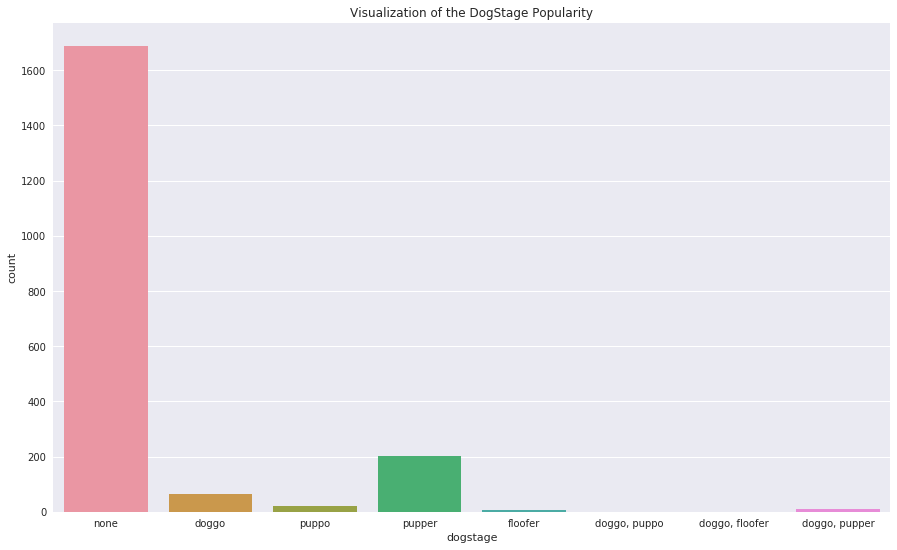

In [90]:
# What dogstage is the most popular?. 
# In this visualization. "None" will not taken into consideration even though it appears in the visualization
sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(df.dogstage)
plt.title('Visualization of the DogStage Popularity')
plt.show()

#### OBSERVATION

From the plot above, it can shown that *__pupper__* is the most popular dog stage in the dataset,followed by *__doggo__*

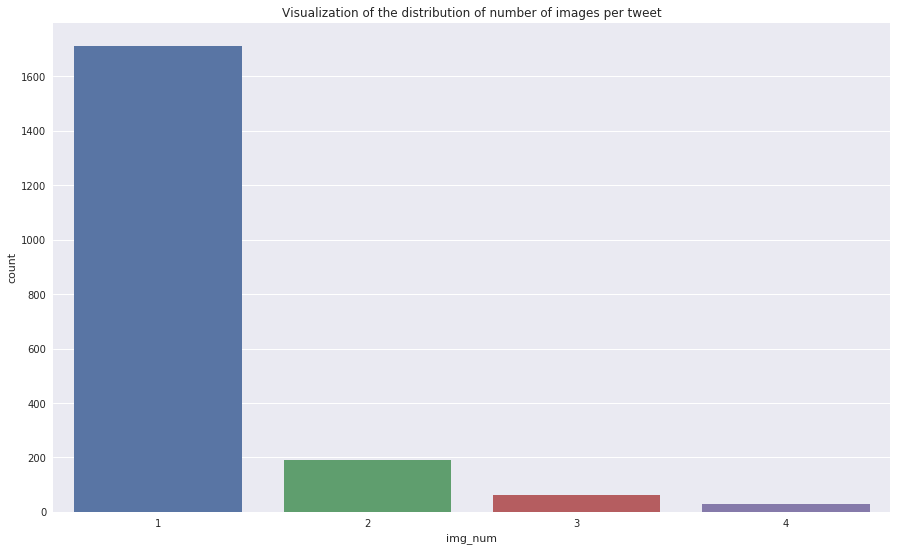

In [91]:
# What is the distribution of the number of images per tweet

sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(df.img_num)
plt.title('Visualization of the distribution of number of images per tweet')
plt.show()

#### OBSERVATION 

From the plot above, it can be shown that most tweet posted one image of their dogs

The above marks the end of the wrangling process for this project.

Thank you for your time